## Draw figures about results of smaller data experiments

In [1]:
import re
from pandas import DataFrame as df
from pandas import read_csv
import pandas
from plotnine import ggplot, geom_point, aes, geom_line
from plotnine import geom_abline, geom_hline, ggtitle

In [2]:
df = read_csv('edt_2.6/results_smaller_data.csv') \
      .rename(columns={'LAS_test': 'test LAS'}) \
      .rename(columns={'LAS_train': 'train LAS'}) \
      .drop(['LAS_gap', 'UAS_test', 'UAS_train'], axis=1)

In [3]:
pandas.set_option('display.max_colwidth', None)
df

,experiment,test LAS,train LAS,test_words,train_words
0,eval_stanza_morph_extended_smaller_data_01_08_only_wordforms_010,0.6699,0.9456,40815,33549
1,eval_stanza_morph_extended_smaller_data_01_08_only_wordforms_020,0.7386,0.9610,40815,65394
2,eval_stanza_morph_extended_smaller_data_01_08_only_wordforms_030,0.7723,0.9314,40815,98696
3,eval_stanza_morph_extended_smaller_data_01_08_only_wordforms_040,0.7903,0.9321,40815,132067
4,eval_stanza_morph_extended_smaller_data_01_08_only_wordforms_050,0.8075,0.9170,40815,163644
5,eval_stanza_morph_extended_smaller_data_01_08_only_wordforms_060,0.8177,0.9241,40815,197109
6,eval_stanza_morph_extended_smaller_data_01_08_only_wordforms_070,0.8162,0.9115,40815,229138
7,eval_stanza_morph_extended_smaller_data_01_08_only_wordforms_080,0.8250,0.9131,40815,260607
8,eval_stanza_morph_extended_smaller_data_01_08_only_wordforms_090,0.8274,0.9084,40815,292517
9,eval_stanza_morph_extended_smaller_data_01_08_only_wordforms_100,0.8313,0.9040,40815,325531


In [4]:
df.loc[:, 'model'] = df.apply(lambda x: x['experiment'].replace('eval_stanza_morph_extended_smaller_data_', 'stanza_ME_'), axis=1)
df.loc[:, 'model'] = df.apply(lambda x: re.sub(r'_[0-9]+$','',x['model']), axis=1)
df.loc[:, 'model'] = df.apply(lambda x: re.sub(r'_09_only_pos_feats$','',x['model']), axis=1)
df.loc[:, 'model'] = df.apply(lambda x: re.sub(r'_08','',x['model']), axis=1)
df.loc[:, 'training size']  = df.apply(lambda x: int((x['experiment'].split('_')[-1]).lstrip('0')), axis=1) 
df = df.drop(['experiment'], axis=1)
df

,test LAS,train LAS,test_words,train_words,model,training size
0,0.6699,0.9456,40815,33549,stanza_ME_01_only_wordforms,10
1,0.7386,0.9610,40815,65394,stanza_ME_01_only_wordforms,20
2,0.7723,0.9314,40815,98696,stanza_ME_01_only_wordforms,30
3,0.7903,0.9321,40815,132067,stanza_ME_01_only_wordforms,40
4,0.8075,0.9170,40815,163644,stanza_ME_01_only_wordforms,50
5,0.8177,0.9241,40815,197109,stanza_ME_01_only_wordforms,60
6,0.8162,0.9115,40815,229138,stanza_ME_01_only_wordforms,70
7,0.8250,0.9131,40815,260607,stanza_ME_01_only_wordforms,80
8,0.8274,0.9084,40815,292517,stanza_ME_01_only_wordforms,90
9,0.8313,0.9040,40815,325531,stanza_ME_01_only_wordforms,100


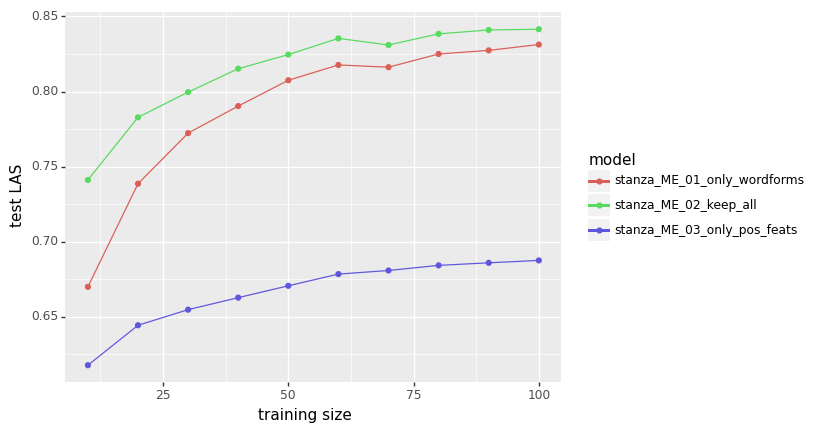

<ggplot: (155228865940)>

C:\Programmid\Miniconda3\envs\py38_estnltk_neural\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 8 x 6 in image.
C:\Programmid\Miniconda3\envs\py38_estnltk_neural\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: figure_1.pdf


In [5]:
p = ggplot(df) + geom_point(aes(x='training size', y='test LAS', color='model'))
p = p + geom_line(aes(x='training size', y='test LAS', color='model'))
display(p)
p.save('figure_1.pdf', height=6, width=8)

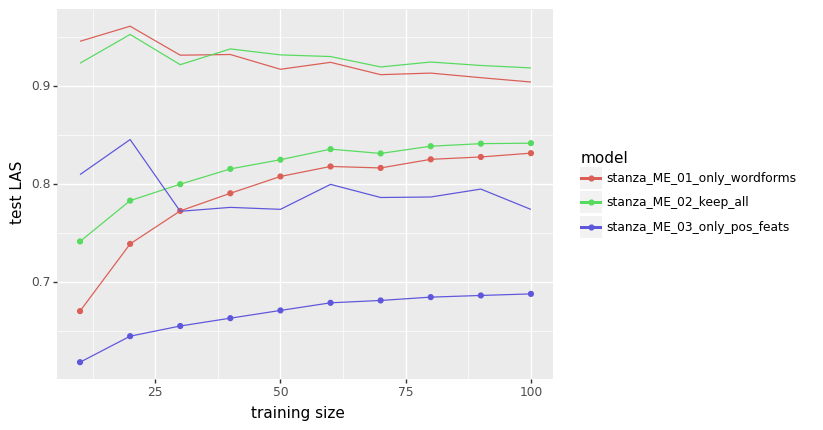

<ggplot: (155266588133)>

In [6]:
p = ggplot(df) + geom_point(aes(x='training size', y='test LAS', color='model'))
p = p + geom_line(aes(x='training size', y='test LAS', color='model'))
p = p + geom_line(aes(x='training size', y='train LAS', color='model'))
display(p)

## Extrapolation of test and training errors

* We use the range 70% - 100% for the extrapolation
* We use linear regression to find the linear trend



stanza_ME_01_only_wordforms
Test fit: 0.00047700000000000075 * x + 0.78443
Train fit: -0.00027199999999999886 * x + 0.9323699999999999
Improvement rate 1.47
Min stablisation size: 197.52% 642978
Limiting training error: 87.86%


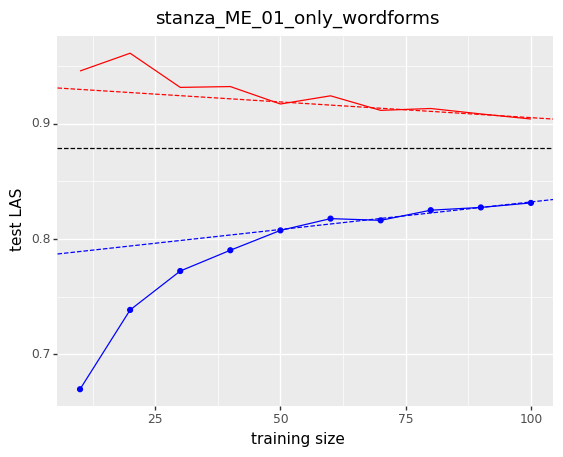

<ggplot: (155268842466)>

stanza_ME_02_keep_all
Test fit: 0.00034100000000000135 * x + 0.8089899999999998
Train fit: -6.499999999999949e-05 * x + 0.9263
Improvement rate 1.05
Min stablisation size: 288.94% 940592
Limiting training error: 90.75%


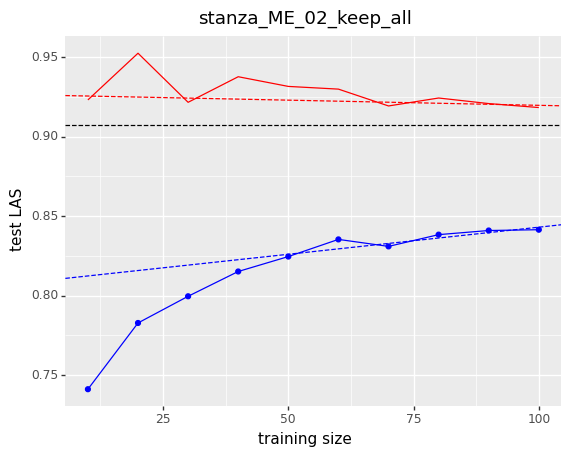

<ggplot: (155268886266)>

stanza_ME_03_only_pos_feats
Test fit: 0.0002180000000000004 * x + 0.6660699999999999
Train fit: -0.00028499999999999966 * x + 0.8094499999999999
Improvement rate 0.67
Min stablisation size: 285.05% 927925
Limiting training error: 72.82%


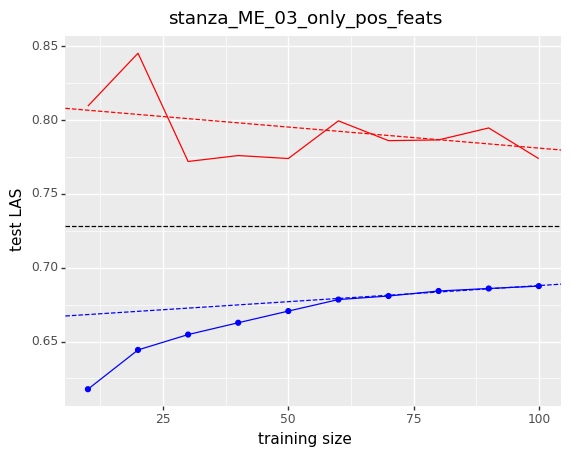

<ggplot: (155266567602)>

In [7]:
from sklearn.linear_model import LinearRegression

#
#  (!) Note: on calculating LAS scores, punctuation is ignored
#      and the score is calculated only on non-punctuation 
#      tokens.
#      Therefore, we use training set size without punctuation
#      also in our estimation.
#
tr_size = 325531

lm = LinearRegression()
for model in df['model'].unique():

    print(model)
    data = df.set_index('model').loc[model]

    # Test
    X = data.loc[data['training size']>=70, ['training size']]
    y = data.loc[data['training size']>=70, 'test LAS']
    lm.fit(X,y) 
    a = lm.coef_[0]
    b = lm.intercept_
    print('Test fit: {} * x + {}'.format(a, b))

    X = data.loc[data['training size']>=70, ['training size']]
    y = data.loc[data['training size']>=70, 'train LAS']
    lm.fit(X,y) 
    c = lm.coef_[0]
    d = lm.intercept_
    print('Train fit: {} * x + {}'.format(c, d))

    print('Improvement rate {:.2f}'.format((100 * a) * (100000/tr_size * 100)) )

    e = (d-b)/(a-c)
    lim_las = (a * e + b)
    print('Min stablisation size: {:.2f}% {:.0f}'.format(e, e * tr_size / 100))
    print('Limiting training error: {:.2f}%'.format(100 * lim_las)) 

    p = ggplot(data) + geom_point(aes(x='training size', y='test LAS'), color='blue')
    p = p + geom_line(aes(x='training size', y='test LAS'), color = 'blue')
    p = p + geom_line(aes(x='training size', y='train LAS'), color='red')
    p = p + geom_abline(intercept=b, slope=a, linetype='dashed', color = 'blue')
    p = p + geom_abline(intercept=d, slope=c, linetype='dashed', color = 'red')
    p = p + geom_hline(yintercept=lim_las, linetype='dashed')
    p = p + ggtitle(model)
    display(p)